<h4><span style='color:blue'>13.</span></h4>


<p><strong>Computer Lab – Chemical Kinetics 1</strong></p>
<p><strong>Goal</strong>: The purpose of this lab is to become familiar with modeling a simple ligand binding reaction.</p>
<p><strong>Introduction</strong></p>
<p>Consider a binding reaction where ligand ($L$) binds to a protein receptor ($R$) to form a loosely bound encounter complex ($L\cdot R$), and finally a tightly bound product ($P$) with the forward and backward rate constants $k_{f}$ and $k_{b}$, respectively.<a href="#fn_note1" class="footnote-ref" id="fn_note1"><sup>1</sup></a></p>

$$L + R \underset{k_{b1}}{\stackrel{k_{f1}}{⥂}} L\cdot R \stackrel{k_{f2}}{\rightarrow} P \tag{1}$$


<p>First, we need to write out the elementary rate equations:</p>

\begin{align*}
    \\
    \frac{d[L]}{dt} &= \frac{d[R]}{dt} = -k_{f1}[L][R] + k_{b1}[L\cdot R] \tag{1.1}\\
    \frac{d[L\cdot R]}{dt} &= k_{f1}[L][R] -k_{b1}[L\cdot R] - k_{f2}[L\cdot R] \tag{1.2}\\
    \frac{d[P]}{dt} &=  k_{f2}[L\cdot R] \tag{1.3}
    \\
\end{align*}

Next, we apply a steady state approximation on $d[L\cdot R]/dt$:

\begin{equation}
k_{b1}[L\cdot R] = k_{f1}[L][R] - k_{f2}[L\cdot R]
 \implies \boxed{[L\cdot R] = \left( \frac{k_{f1}}{k_{b1}+k_{f2}} [L][R]\right)}
\end{equation}

Now, we take $[L\cdot R]$ and substitute into equations ${1.1}$ and ${1.3}$. 

\begin{align}
    \frac{d[L]}{dt} &= \frac{d[R]}{dt} = -k_{f1}[L][R] + k_{b1}\left(\frac{k_{f1}}{k_{b1}+k_{f2}} [L][R] \right) \tag{1.1a}\\
    \frac{d[P]}{dt} &=  k_{f2} \left( \frac{k_{f1}}{k_{b1}+k_{f2}} [L][R]\right) \tag{1.3a}
\end{align}


<section class="footnotes">
<hr>
<ol>
<li id="fn_note1"><p>Note that this last kinetic step is “one-way”, which violates thermodynamics (!). Don’t worry about this yet (we’re getting to kinetics soon in the lecture). For now, suffice it to say that here we invoke the assumption that the back rate is very small compared to forward rate.<a href="#fn_note1" class="footnote-back">↩</a></p></li>
</ol>
<hr>
</section>




<p>Let’s walk through the steps of how to build a model of this receptor-ligand reaction using Python.</p>

<p><strong>Procedure</strong></p>
<p><strong>Part I.</strong></p>
<ol class="incremental" type="1">
<li><p>Set initial concentration of ligand to 10.0 and receptor to 5.0</p></li>
<li><p>Set <code>rate_eqs=ODE_eqs_part_I</code></p></li>
<ol class="incremental" type="a">
<ol class="incremental" type="i">
<li><p>set “Forward Rate Parameter” ($k_{f1}$) value to 0.02</p></li>
<li><p>set “Reverse Rate Parameter” ($k_{b1}$) value to 0.01</p></li>
</ol></li>
</ol></li>
<li><p>Run the simulation and save the graph.</p></li>
</ol></li>
</ol>
<p><strong>Part II.</strong></p>
<ol class="incremental" type="1">
<li><p>Repeat simulation for following values:</p>
<li><p>Add "k-prod" ($k_{f2}$) and set value to 0.05.</p></li>
<li><p>Set <code>rate_eqs=ODE_eqs_part_II</code></p></li>
<li><p>Run the simulation and save the graph.</p></li>
<ol class="incremental" start="1" type="a">
<li><p>Does the reaction reach a steady state?</p></li>
<li><p>If not, increase simulation time to 100 </p></li>
</ol></li>
<li><p>Repeat simulation for following values:</p>
<ol class="incremental" start="3" type="a">
<li><p>“Forward Rate Parameter” ($k_{f1}$): 0.01 , “Reverse Rate Parameter” ($k_{b1}$): 0.02 , “k-prod” ($k_{f2}$): 0.05</p></li>
<li><p>“Forward Rate Parameter” ($k_{f1}$): 0.02, “Reverse Rate Parameter” ($k_{b1}$): 0.01 , “k-prod” ($k_{f2}$): 0.5</p></li>
</ol></li>
<!--
<li><p>Now, add a new cell block under each simulation in Part II.edit the rate equations using the steady state approximation and compare the simulations:</p>
<ol class="incremental" start="3" type="a">    
<li><p>Set <code>rate_eqs=ODE_eqs_part_II_SS</code></p></li>
<li><p>What differences do you see?</p></li>
</ol></li>
-->
</ol>
    
    

In [5]:
import numpy as np
import pandas as pd

In [6]:
def ODE_eqs_part_I(C, t, k):
    r"""
    :math:`L + R \underset{k_{b1}}{\stackrel{k_{f1}}{⥂}} L\cdot R`

    Args:
        C(list): collection of concentrations for each species [L, R, LR]
        t(float): iterate over some time-course
        k(list): collection of rate constants [kf1, kb1]
    """
    
    kf1, kb1 = k[0], k[1]
    dC1dt = -kf1*C[0]*C[1]+kb1*C[2]
    dC0dt = dC1dt
    dC2dt = -dC1dt
    return [dC0dt, dC1dt, dC2dt]


def ODE_eqs_part_II(C, t, k):
    r"""See eqs 1.1, 1.2 and 1.3
    :math:`L + R \underset{k_{b1}}{\stackrel{k_{f1}}{⥂}} L\cdot R \stackrel{k_{f2}}{\rightarrow} P`

    Args:
        C(list): collection of concentrations for each species [L, R, LR, P]
        t(float): iterate over some time-course
        k(list): collection of rate constants [kf1, kb1, kf2]
    """
    
    kf1, kb1, kf2 = k[0], k[1], k[2]
    dC1dt = -kf1*C[0]*C[1]+kb1*C[2]
    dC0dt = dC1dt
    dC2dt = k[0]*C[0]*C[1]-k[1]*C[2]-k[2]*C[2]
    dC3dt = kf2*C[2]
    return [dC0dt, dC1dt, dC2dt, dC3dt]


def ODE_eqs_part_II_SS(C, t, k):
    r"""See eqs 1.2, 1.1a and 1.3a
    Using the steady state approximation on dLR/dt.
    :math:`L + R \underset{k_{b1}}{\stackrel{k_{f1}}{⥂}} L\cdot R \stackrel{k_{f2}}{\rightarrow} P`

    Args:
        C(list): collection of concentrations for each species [L, R, LR, P]
        t(float): iterate over some time-course
        k(list): collection of rate constants [kf1, kb1, kf2]
    """
    
    kf1, kb1, kf2 = k[0], k[1], k[2]
    dC1dt = -kf1*C[0]*C[1]+kb1*(kf1/(kb1+kf2)*C[0]*C[1])
    dC0dt = dC1dt
    dC2dt = k[0]*C[0]*C[1]-k[1]*C[2]-k[2]*C[2]
    dC3dt = kf2*(kf1/(kb1+kf2)*C[0]*C[1])
    return [dC0dt, dC1dt, dC2dt, dC3dt]


def simulate(steps, simulation_time, parameters, rate_eqs):
    """Method for integrating the ODEs with SciPy odeint
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

    Args:
        steps(int): number of iterations
        simulation_time(int): duration of simulation (units: s)
        parameters(dict): {'species': ['L', 'R', 'LR'],\
                          'k': [kf1, kb1, kf2, kb2, ...],\  # rate constants
                          'InitConc': [L, R, P, ...]}       # initial concentrations (units: M)
        rate_eqs(function): method containing the ordinary differential equations
    Returns:
        Pandas DataFrame, plot
    """
    
    from scipy.integrate import odeint
    print(f"Number of species: {len(parameters['InitConc'])}")
    time = np.linspace(0, simulation_time, steps) 
    C = odeint(rate_eqs, parameters["InitConc"], time, (parameters["k"],)).transpose()
    data = {"time": time, **{"%s"%s: C[i] for i,s in enumerate(parameters["species"])}}
    df = pd.DataFrame(data)
    plot = df.plot(x="time", y=parameters["species"], figsize=(10, 4),
                   xlim=(data["time"][0], data["time"][-1]))
    return df,plot



Number of species: 3


,time,L,R,LR
0,0.00000,10.000000,5.000000,0.000000
1,0.01001,9.990005,4.990005,0.009995
2,0.02002,9.980042,4.980042,0.019958
3,0.03003,9.970109,4.970109,0.029891
4,0.04004,9.960207,4.960207,0.039793
...,...,...,...,...
995,9.95996,6.274527,1.274527,3.725473
996,9.96997,6.273299,1.273299,3.726701
997,9.97998,6.272074,1.272074,3.727926
998,9.98999,6.270851,1.270851,3.729149


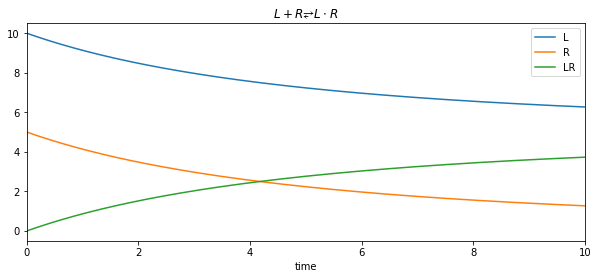

In [7]:
parameters = {"species": ["L","R","LR"],
             "InitConc": [10, 5, 0],
              #          [kf1, kb1, kf2]
             "k":        [0.02, 0.01, "NaN"]}
#print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=10,
                   parameters=parameters, rate_eqs=ODE_eqs_part_I) 
plot = plot.set_title(r"$L + R ⥂ L\cdot R$")
fig = plot.get_figure()
#fig.savefig("figure.png")
df

Number of species: 4


,time,L,R,LR,P
0,0.0000,10.000000,5.000000,0.000000,0.000000
1,0.1001,9.901431,4.901431,0.098322,0.000248
2,0.2002,9.805835,4.805835,0.193187,0.000978
3,0.3003,9.713087,4.713087,0.284737,0.002176
4,0.4004,9.623069,4.623069,0.373108,0.003823
...,...,...,...,...,...
995,99.5996,5.013633,0.013633,0.078921,4.907446
996,99.6997,5.013575,0.013575,0.078585,4.907840
997,99.7998,5.013517,0.013517,0.078250,4.908233
998,99.8999,5.013460,0.013460,0.077916,4.908623


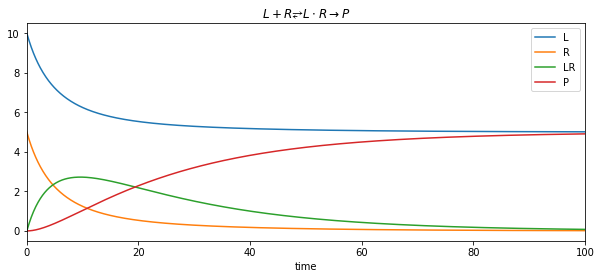

In [8]:
parameters = {"species": ["L","R", "LR", "P"],
             "InitConc": [10, 5, 0, 0],
             #            [kf1, kb1, kf2, ...]
             "k":        [0.02, 0.01, 0.05, "NaN"]}
#print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=100,
                   parameters=parameters, rate_eqs=ODE_eqs_part_II) 
plot = plot.set_title(r"$L + R ⥂ L\cdot R \rightarrow P$")
fig = plot.get_figure()
#fig.savefig("figure.png")
df

Number of species: 4


,time,L,R,LR,P
0,0.0000,10.000000,5.000000,0.000000,0.000000
1,0.1001,9.917615,4.917615,0.098565,0.082385
2,0.2002,9.837243,4.837243,0.194130,0.162757
3,0.3003,9.758816,4.758816,0.286797,0.241184
4,0.4004,9.682265,4.682265,0.376664,0.317735
...,...,...,...,...,...
995,99.5996,5.000621,0.000621,0.035247,4.999379
996,99.6997,5.000616,0.000616,0.035043,4.999384
997,99.7998,5.000611,0.000611,0.034839,4.999389
998,99.8999,5.000606,0.000606,0.034636,4.999394


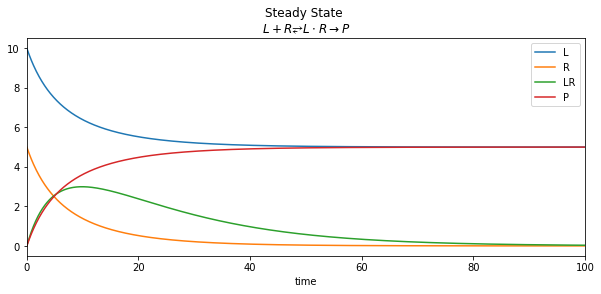

In [22]:
parameters = {"species": ["L","R", "LR", "P"],
             "InitConc": [10, 5, 0, 0],
             #            [kf1, kb1, kf2, ...]
             "k":        [0.02, 0.01, 0.05, "NaN"]}
#print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=100,
                   parameters=parameters, rate_eqs=ODE_eqs_part_II_SS) 
plot = plot.set_title(r"""Steady State 
$L + R ⥂ L\cdot R \rightarrow P$""")
fig = plot.get_figure()
#fig.savefig("figure.png")
df

Number of species: 4


,time,L,R,LR,P
0,0.0000,10.000000,5.000000,0.000000,0.000000
1,0.1001,9.950373,4.950373,0.049503,0.000124
2,0.2002,9.901577,4.901577,0.097929,0.000494
3,0.3003,9.853594,4.853594,0.145303,0.001103
4,0.4004,9.806406,4.806406,0.191647,0.001946
...,...,...,...,...,...
995,99.5996,5.152169,0.152169,0.188526,4.659305
996,99.6997,5.151763,0.151763,0.187991,4.660247
997,99.7998,5.151357,0.151357,0.187457,4.661186
998,99.8999,5.150952,0.150952,0.186925,4.662123


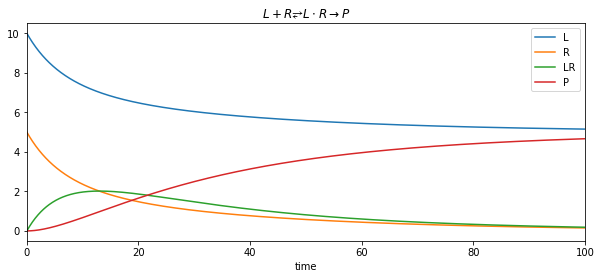

In [10]:
#“Forward Rate Parameter” ( 𝑘𝑓1 ): 0.01 , “Reverse Rate Parameter” ( 𝑘𝑏1 ): 0.02 , “k-prod” ( 𝑘𝑓2 ): 0.05
parameters = {"species": ["L","R", "LR", "P"],
             "InitConc": [10, 5, 0, 0],
             #           [kf1, kb1, kf2, ...]              
             "k":        [0.01, 0.02, 0.05, "NaN"]}
df,plot = simulate(steps=1000, simulation_time=100,
                   parameters=parameters, rate_eqs=ODE_eqs_part_II) 
plot = plot.set_title(r"$L + R ⥂ L\cdot R \rightarrow P$")
fig = plot.get_figure()
#fig.savefig("figure.png")
df

Number of species: 4


,time,L,R,LR,P
0,0.0000,10.000000,5.000000,0.000000,0.000000
1,0.1001,9.901430,4.901430,0.096132,0.002438
2,0.2002,9.805829,4.805829,0.184675,0.009496
3,0.3003,9.713068,4.713068,0.266126,0.020806
4,0.4004,9.623026,4.623026,0.340950,0.036025
...,...,...,...,...,...
995,99.5996,5.000151,0.000151,0.000037,4.999813
996,99.6997,5.000149,0.000149,0.000036,4.999815
997,99.7998,5.000148,0.000148,0.000036,4.999817
998,99.8999,5.000146,0.000146,0.000035,4.999818


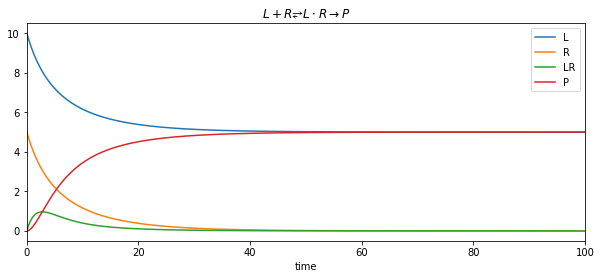

In [11]:
#“Forward Rate Parameter” ( 𝑘𝑓1 ): 0.02, “Reverse Rate Parameter” ( 𝑘𝑏1 ): 0.01 , “k-prod” ( 𝑘𝑓2 ): 0.5
parameters = {"species": ["L","R", "LR", "P"],
             "InitConc": [10, 5, 0, 0],
             "k":        [0.02, 0.01, 0.5, "NaN"]}
df,plot = simulate(steps=1000, simulation_time=100,
                   parameters=parameters, rate_eqs=ODE_eqs_part_II) 
plot = plot.set_title(r"$L + R ⥂ L\cdot R \rightarrow P$")
fig = plot.get_figure()
#fig.savefig("figure.png")
df

<p><strong>Bonus</strong></p>
<p>This same reaction can be used to describe Michaelis-Menten enzyme kinetics, in which substrate (S) binds a protein enzyme (E) to form an encounter complex (E∙S), and then chemically converts to product (E + P).</p>


$$E + S \underset{k_{b1}}{\stackrel{k_{f1}}{⥂}} E\cdot S \stackrel{k_{cat}}{\to} E + P$$




<p>Suppose an enzyme has <em>k</em><sub>f1</sub> = 10<sup>7</sup> s<sup>-1</sup>, <em>k</em><sub>b1</sub> = 10<sup>6</sup> s<sup>-1</sup> and <em>k</em><sub>cat</sub> = 10<sup>4</sup> s<sup>-1</sup>. By adjusting parameters in the function above, which of these rates constants would you say most sensitively controls the overall rate of catalysis?</p>



### Answer: $k_{cat}$. See plots below...

Number of species: 4


,time,E,S,ES,P
0,0.000000e+00,10.000000,5.000000,0.000000,0.000000e+00
1,1.001001e-10,9.950325,4.950325,0.049674,2.492510e-08
2,2.002002e-10,9.901391,4.901391,0.098609,9.920206e-08
3,3.003003e-10,9.853182,4.853182,0.146818,2.220980e-07
4,4.004004e-10,9.805681,4.805681,0.194318,3.928954e-07
...,...,...,...,...,...
995,9.959960e-08,5.109270,0.109270,4.886501,4.229018e-03
996,9.969970e-08,5.109200,0.109200,4.886566,4.233910e-03
997,9.979980e-08,5.109131,0.109131,4.886630,4.238801e-03
998,9.989990e-08,5.109062,0.109062,4.886694,4.243693e-03


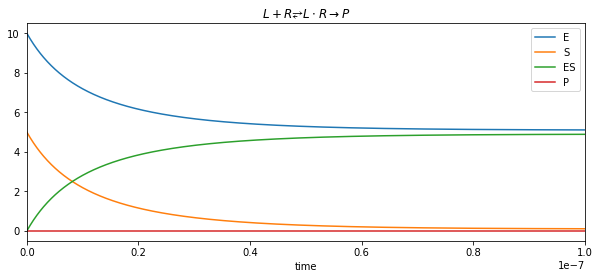

In [23]:
parameters = {"species": ["E","S", "ES", "P"],
             "InitConc": [10, 5, 0, 0],
             #            [kf1, kb1, kf2, ...]
             "k":        [1e7, 1e6, 1e4, "NaN"]}
#print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=1e-7,
                   parameters=parameters, rate_eqs=ODE_eqs_part_II) 
plot = plot.set_title(r"$L + R ⥂ L\cdot R \rightarrow P$")
fig = plot.get_figure()
#fig.savefig("figure.png")
df

Number of species: 4


,time,E,S,ES,P
0,0.000000e+00,10.000000,5.000000,0.000000,0.000000
1,1.001001e-10,9.950325,4.950325,0.049426,0.000248
2,2.002002e-10,9.901391,4.901391,0.097623,0.000985
3,3.003003e-10,9.853181,4.853181,0.144620,0.002199
4,4.004004e-10,9.805681,4.805681,0.190442,0.003877
...,...,...,...,...,...
995,9.959960e-08,5.018907,0.018907,0.018749,4.962345
996,9.969970e-08,5.018814,0.018814,0.018654,4.962532
997,9.979980e-08,5.018722,0.018722,0.018560,4.962718
998,9.989990e-08,5.018630,0.018630,0.018467,4.962903


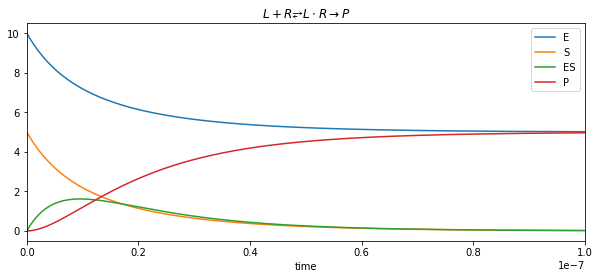

In [28]:
parameters = {"species": ["E","S", "ES", "P"],
             "InitConc": [10, 5, 0, 0],
             #            [kf1, kb1, kf2, ...]
             "k":        [1e7, 1e6, 1e8, "NaN"]}
#print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=1e-7,
                   parameters=parameters, rate_eqs=ODE_eqs_part_II) 
plot = plot.set_title(r"$L + R ⥂ L\cdot R \rightarrow P$")
fig = plot.get_figure()
#fig.savefig("figure.png")
df

Number of species: 4


,time,E,S,ES,P
0,0.000000e+00,10.000000,5.000000,0.000000,0.000000
1,1.001001e-10,9.950811,4.950811,0.049430,0.049189
2,2.002002e-10,9.902344,4.902344,0.097638,0.097656
3,3.003003e-10,9.854582,4.854582,0.144651,0.145418
4,4.004004e-10,9.807511,4.807511,0.190497,0.192489
...,...,...,...,...,...
995,9.959960e-08,5.018120,0.018120,0.018147,4.981880
996,9.969970e-08,5.018030,0.018030,0.018055,4.981970
997,9.979980e-08,5.017940,0.017940,0.017963,4.982060
998,9.989990e-08,5.017851,0.017851,0.017872,4.982149


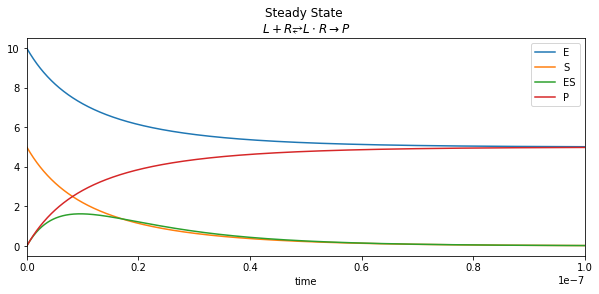

In [29]:
parameters = {"species": ["E","S", "ES", "P"],
             "InitConc": [10, 5, 0, 0],
             #            [kf1, kb1, kf2, ...]
             "k":        [1e7, 1e6, 1e8, "NaN"]}
#print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=1e-7,
                   parameters=parameters, rate_eqs=ODE_eqs_part_II_SS) 
plot = plot.set_title(r"""Steady State 
$L + R ⥂ L\cdot R \rightarrow P$""")
fig = plot.get_figure()
#fig.savefig("figure.png")
df